#Atividade prática

Dados os pontos da tabela:

|x|	y|
|--|--|
10 | 227.04 |
15 |362.78| 
20 |517.35| 
22.5 | 602.97|

Utilizando o método direto encontre (manualmente) os coeficiente do polinômio interpolador de ordem 3. Trace o gráfico entre 10 e 22.5 com intervalo de 0.01 entre os pontos

Utilizando o método de Newton encontre (manualmente) os coeficientes do polinômio interpolador de ordem 3. Trace o gráfico entre 10 e 22.5 com intervalo de 0.01 entre os pontos

In [ ]:
#implementações
import numpy as np
import matplotlib.pyplot as plt


def pd(inicio,fim,m_val,m_controle,val_x,val_y):
  if m_controle[inicio,fim]:
    return m_val[inicio,fim] 
  if(inicio==fim):
    return val_y[inicio]
  m_val[inicio,fim]=(pd(inicio+1,fim,m_val,m_controle,val_x,val_y)-pd(inicio,fim-1,m_val,m_controle,val_x,val_y))/(val_x[fim]-val_x[inicio])
  m_controle[inicio,fim]=1
  return m_val[inicio,fim];

def newton(x,val_x,val_y):
  coeficientes = np.zeros(val_x.shape[0])
  m_val=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=float)
  m_controle=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=bool)
  res=0;
  diferenca=1;
  for i in range (coeficientes.shape[0]):
    coeficientes[i]=pd(0,i,m_val,m_controle,val_x,val_y)
    res+=diferenca*coeficientes[i]
    diferenca*=x-val_x[i]
  print('Valores dos coeficientes = ',coeficientes);
  #print('f(',x,') = ', res,sep='')
  return coeficientes

def pivotamento(matriz):
  for i in range(matriz.shape[0]):
    maior_abs=np.abs(matriz[i,i])
    maior=matriz[i,i]
    for q in range(i+1,matriz.shape[0]): 
      if(np.abs(matriz[q,i])>maior_abs): 
        maior=matriz[q,i] 
        matriz[[i,q]]=matriz[[q,i]] 
    pivo=maior 
    equacao_pivo=matriz[i,:] 
    j=i+1 
    while(j<matriz.shape[0]): 
      eliminador=matriz[j,i]/pivo 
      matriz[j,:]=matriz[j,:]-(eliminador*equacao_pivo) 
      j=j+1 
  return matriz 

def substituicao(matriz):
  solucoes=np.zeros(matriz.shape[0],dtype=float) 
  solucoes[-1]=matriz[-1,-1]/matriz[-1,-2] 
  soma=0
  for i in range(-(matriz.shape[0]-2),1): 
    for j in range(matriz.shape[0]): 
      if(j!=-i): 
        soma+=solucoes[j]*matriz[-i,j] 
    solucoes[-i]=(matriz[-i,-1]-soma)/matriz[-i,-i] 
    soma=0 
  return solucoes 

def gauss_pivotamento(matriz_sistema):
  return substituicao(pivotamento(matriz_sistema))

def direto(x,val_x,val_y):
  m=np.zeros((val_x.shape[0],val_x.shape[0]+1)) #preenche-se uma matriz de zeros
  m[:,-1]=val_y.copy()#ultima coluna recebe os valores de y
  for i in range(val_x.shape[0]):
    for j in range(val_x.shape[0]):
      m[i,j]=val_x[i]**j #x^n+x^n-1+x^n-2+...+x^2+x+0 = y
  coeficientes=gauss_pivotamento(m) #resolvo o sistema
  res=0
  for k in range(len(coeficientes)):
    res+=coeficientes[k]*x**k
  print('Coeficientes = ', coeficientes)
  #print('f(',x,') = ', res,sep='')
  return coeficientes



Coeficientes =  [-4.25400000e+00  2.12655333e+01  1.32040000e-01  5.43466667e-03]
Coeficiente de grau 3 =  0.005434666666666544


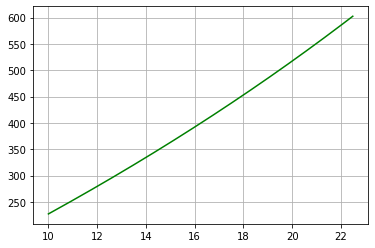

In [ ]:
#1. DIRETO
x=np.array([10.0,15.0,20.0,22.5])
y=np.array([227.04,362.78,517.35,602.97])

a=direto(12.0,x,y)
print('Coeficiente de grau 3 = ',a[-1])
x1=np.arange(10.0,22.5,0.01,dtype=float);
y1=np.zeros(x1.shape[0],dtype=float)
for i in range(x1.shape[0]):
  for j in range(a.shape[0]):
    y1[i]+=a[j]*x1[i]**j

plt.plot(x1,y1,'g-')
plt.grid(1)
plt.show()


Valores dos coeficientes =  [2.27040000e+02 2.71480000e+01 3.76600000e-01 5.43466667e-03]
Coeficiente de grau 3 =  0.005434666666666525


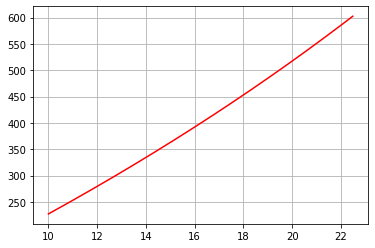

In [ ]:
#2. NEWTON
val_x=np.array([10.0,15.0,20.0,22.5])
val_y=np.array([227.04,362.78,517.35,602.97])
h=14.0
a=newton(h,val_x,val_y)
print('Coeficiente de grau 3 = ',a[-1])
x2=np.arange(10.0,22.5,0.01,dtype=float);
y2=np.zeros(x2.shape[0],dtype=float)
for i in range(x2.shape[0]):
  res=0
  diferenca=1
  for j in range(a.shape[0]):
    y2[i]+=diferenca*a[j]
    diferenca*=x2[i]-val_x[j]
plt.plot(x2,y2,'r-')
plt.grid(1)
plt.show()